In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spacextoy-dataanalysis-launchprediction/SpaceX Metadata.docx
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_correlation.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_contracts_customers_known_revenue.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/Fairing Null Handling Cleaning Adding Financial Columns.docx
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_encoded.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_financials_raw.xlsx
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_extra_correlation.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_financials.csv


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
data = pd.read_csv('/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,ReusedCore,...,ReusedFairings,CostCoreMil,CostFairingsMil,CostOtherMil,CostKgMil,CostTotalMil,RevenueReuseMil,RevenueKgMil,RevenueTotalMil,ProfitMil
0,1,6/4/2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,0,0,...,0,30000000.0,6000000.0,14000000.0,42734715.88,92734715.88,62000000.0,61049594.12,123049594.1,30314878.22
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,0,0,...,0,30000000.0,6000000.0,14000000.0,3675000.00,53675000.00,62000000.0,5250000.00,67250000.0,13575000.00
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,0,0,...,0,30000000.0,6000000.0,14000000.0,4739000.00,54739000.00,62000000.0,6770000.00,68770000.0,14031000.00
3,4,9/29/2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,0,0,...,0,30000000.0,6000000.0,14000000.0,3500000.00,53500000.00,62000000.0,5000000.00,67000000.0,13500000.00
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,0,0,...,0,30000000.0,6000000.0,14000000.0,22190000.00,72190000.00,62000000.0,31700000.00,93700000.0,21510000.00


In [6]:
data.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'ReusedCore', 'Legs',
       'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'Class',
       'Year', 'ReusedFairings', 'CostCoreMil', 'CostFairingsMil',
       'CostOtherMil', 'CostKgMil', 'CostTotalMil', 'RevenueReuseMil',
       'RevenueKgMil', 'RevenueTotalMil', 'ProfitMil'],
      dtype='object')

In [7]:
# select only features based on 8b
data = data[['Class', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'GridFins', 'ReusedCore',
       'ReusedCount', 'ReusedFairings']]

In [9]:
from sklearn.preprocessing import LabelEncoder

In [17]:
data = data.apply(LabelEncoder().fit_transform)

In [21]:
# target variable to Y
Y = data['Class'].to_numpy()

In [25]:
# drop target variable
X = data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print('Dimensions of X_train, X_test, Y_train, Y_test:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Dimensions of X_train, X_test, Y_train, Y_test: (72, 10) (18, 10) (72,) (18,)


In [28]:
# 8b GridSearchCV identified best parameters
# build the model
svm = SVC(C = 1.0, gamma = 0.001, kernel = 'linear').fit(X_train,Y_train)
prediction = svm.predict(X_test)

In [29]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [30]:
Y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [31]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

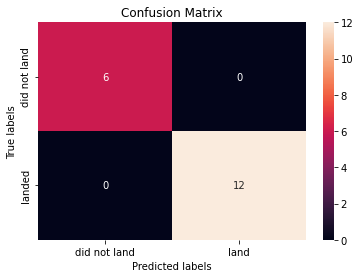

In [32]:
plot_confusion_matrix(Y_test,prediction)

In [34]:
print("Support Vector Machine Classification Report:\n", classification_report(Y_test, prediction))

Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        12

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [36]:
model_df = pd.DataFrame({ 'Model':['Support Vector Machine: Before Feature Selection', 
                                              'Support Vector Machine: After Feature Selection'], 
                                   'Precision Predicting Landing Success': [0.85, 1], 
                                   'Recall Predicting Landing Success': [1, 1], 
                                   'F1 Score Predicting Landing Failure':[0.78, 1],
                                   'F1 Score Weighted Average': [0.87, 1]})
model_df

,Model,Precision Predicting Landing Success,Recall Predicting Landing Success,F1 Score Predicting Landing Failure,F1 Score Weighted Average
0,Support Vector Machine: Before Feature Selection,0.85,1,0.78,0.87
1,Support Vector Machine: After Feature Selection,1.00,1,1.00,1.00


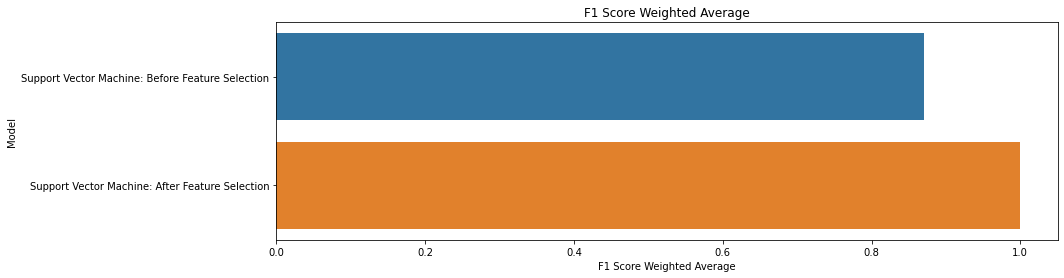

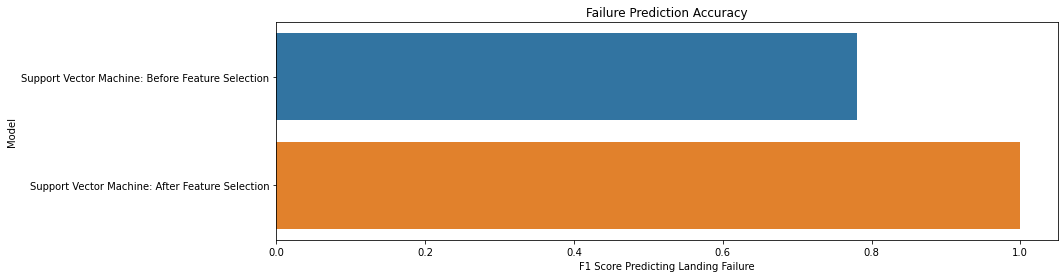

In [39]:
# Visualize the built model accuracy 
plt.figure(figsize=(14,4))
plt.title("F1 Score Weighted Average")
plot = sns.barplot(x='F1 Score Weighted Average',y='Model', data=model_df)
# Visualize the built model accuracy 
plt.figure(figsize=(14,4))
plt.title("Failure Prediction Accuracy")
plot = sns.barplot(x='F1 Score Predicting Landing Failure',y='Model', data=model_df)